In [35]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
from functions import load_and_merge_data, clean_data, calculate_stat_metrics, calculate_completion_rate, perform_chi2_test, calculate_time_spent, age_category,average_time_spent_by_step, time_correlation, bal_category, tenure_category

# --- Load Data ---
df = load_and_merge_data('df_final_demo.txt', 'df_final_experiment_clients.txt', 'df_final_web_data_pt_1.txt', 'df_final_web_data_pt_2.txt')
warnings.simplefilter("ignore")
df.head()
df = clean_data(df)
df = age_category(df)
df = bal_category(df)

In [36]:
for value in df.select_dtypes(include=[np.number]):
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[value] >= lower_bound) & (df[value] <= upper_bound)]

display(df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+),Low
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+),Low
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+),Low
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+),Low
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+),Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321298,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,8756552_54841419737,101846948_96925910026_299041,step_2,2017-04-12 14:58:16,Senior (51+),Low
321299,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,8756552_54841419737,101846948_96925910026_299041,step_3,2017-04-12 14:58:39,Senior (51+),Low
321300,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,8756552_54841419737,101846948_96925910026_299041,confirm,2017-04-12 15:01:19,Senior (51+),Low
321301,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,8756552_54841419737,101846948_96925910026_299041,step_1,2017-04-12 14:50:44,Senior (51+),Low


## Identificación cliente principal

In [37]:
df.to_csv('df.csv')

In [38]:
df.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+),Low
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+),Low
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+),Low
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+),Low
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+),Low


<Axes: xlabel='clnt_age', ylabel='Count'>

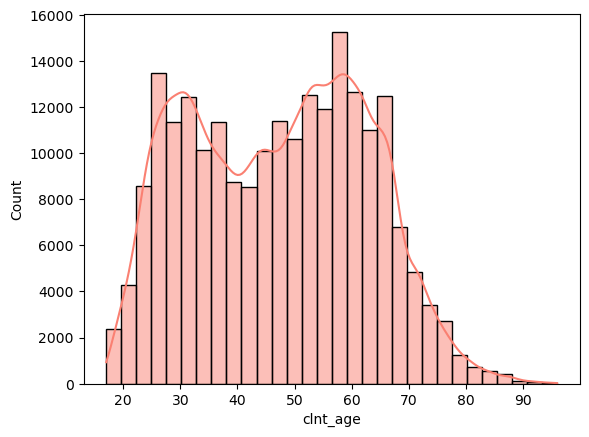

In [39]:
sns.histplot(df['clnt_age'], kde=True, bins=30, color="salmon")

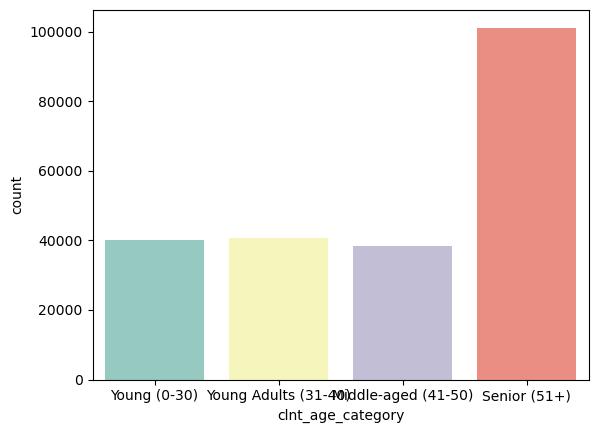

In [40]:
df = age_category(df)
sns.countplot(data=df, x='clnt_age_category', palette="Set3");

In [41]:
age_stat_metrics = calculate_stat_metrics(df, 'clnt_age')
age_stat_metrics

{'mean': 47.2225121615545,
 'median': 48.0,
 'mode': 59.5,
 'variance': 239.48488695939815,
 'std_dev': 15.475299252660614,
 'min': 17.0,
 'max': 96.0,
 'range': 79.0,
 'quartiles': 0.25    33.5
 0.50    48.0
 0.75    59.5
 Name: clnt_age, dtype: float64,
 'skewness': 0.05883303423813741,
 'kurtosis': -0.9582780818839316}

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

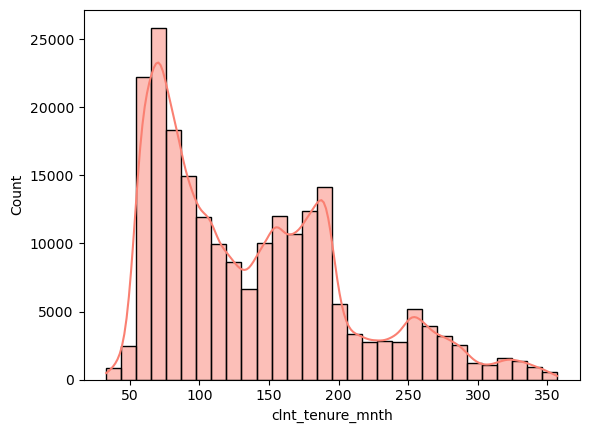

In [42]:

sns.histplot(df['clnt_tenure_mnth'], kde=True, bins=30, color="salmon")


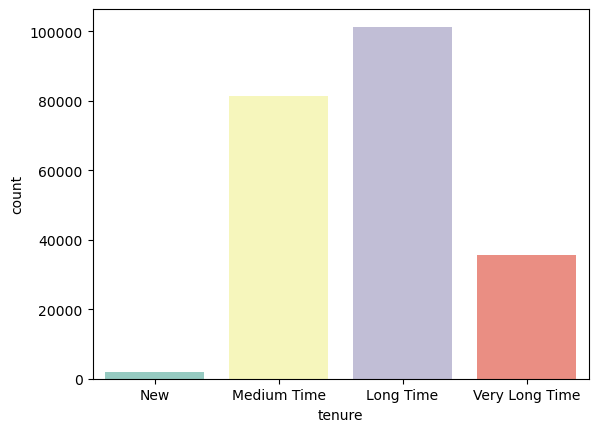

In [43]:
df = tenure_category(df)
sns.countplot(data=df, x='tenure', palette="Set3");

In [44]:
tenure_stat_metrics = calculate_stat_metrics(df, 'clnt_tenure_mnth')
tenure_stat_metrics

{'mean': 138.5623884339188,
 'median': 124.0,
 'mode': 58.0,
 'variance': 4815.457446011159,
 'std_dev': 69.39349714498584,
 'min': 33.0,
 'max': 357.0,
 'range': 324.0,
 'quartiles': 0.25     79.0
 0.50    124.0
 0.75    182.0
 Name: clnt_tenure_mnth, dtype: float64,
 'skewness': 0.8199803806303346,
 'kurtosis': -0.02619788513452459}

In [45]:
df['bal'].describe()


count    220161.000000
mean      70648.327841
std       47784.698163
min       23789.440000
25%       35612.130000
50%       52910.280000
75%       89131.180000
max      238006.220000
Name: bal, dtype: float64

<Axes: xlabel='balance', ylabel='count'>

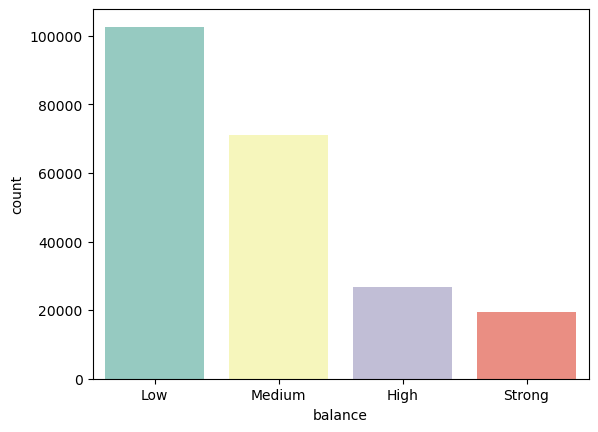

In [46]:
df = bal_category(df)
sns.countplot(data=df, x='balance', palette="Set3")

In [47]:
bal_stat_metrics = calculate_stat_metrics(df, 'bal')
bal_stat_metrics

{'mean': 70648.32784121619,
 'median': 52910.28,
 'mode': 78389.93,
 'variance': 2283377378.5655613,
 'std_dev': 47784.6981633824,
 'min': 23789.44,
 'max': 238006.22,
 'range': 214216.78,
 'quartiles': 0.25    35612.13
 0.50    52910.28
 0.75    89131.18
 Name: bal, dtype: float64,
 'skewness': 1.4804044183844622,
 'kurtosis': 1.5636033000357261}

### CLIENTE PRINCIPAL
- Rango de 51 años o más
- Antigüedad de mas de 8 años
- Balance bajo 

# KPI'S

In [48]:
df.head(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,clnt_age_category,balance,tenure
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Senior (51+),Low,Medium Time
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Senior (51+),Low,Medium Time
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Senior (51+),Low,Medium Time
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Senior (51+),Low,Medium Time
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Senior (51+),Low,Medium Time


In [49]:
# Analize the time spent in each step
df = df.sort_values(by=['visit_id', 'date_time'])
# Calculate time spent on each step
df['time_spent'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds().fillna(0)

# Average time spent on each step by variation
avg_time_spent = df.groupby(['Variation', 'process_step'])['time_spent'].mean().unstack()
print(f'Average Time Spent:\n{avg_time_spent}')
avg_time_spent.to_csv('avg_time_spent.csv')

Average Time Spent:
process_step     confirm      start     step_1     step_2     step_3
Variation                                                           
Control       124.054265  54.388478  42.992353  37.227369  94.933316
Test          113.732575  60.508795  37.121332  48.136459  97.881004


In [68]:
session_duration = df.groupby('visit_id').agg(
    session_start=('date_time', 'min'),
    session_end=('date_time', 'max')
).reset_index()

# Calculate duration in seconds
session_duration['duration'] = (session_duration['session_end'] - session_duration['session_start']).dt.total_seconds()

# Merge back with original data to get variation
session_duration = session_duration.merge(df[['visitor_id','visit_id', 'Variation', 'process_step', 'clnt_age_category', 'time_spent']], on='visit_id', how='left')
session_duration.head()

,visit_id,session_start,session_end,duration,visitor_id,Variation,process_step,clnt_age_category,time_spent
0,100012776_37918976071_457913,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0,451664975_1722933822,Test,confirm,Senior (51+),0.0
1,100012776_37918976071_457913,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0,451664975_1722933822,Test,confirm,Senior (51+),52.0
2,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,612065484_94198474375,Test,start,Young (0-30),0.0
3,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,612065484_94198474375,Test,step_1,Young (0-30),16.0
4,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,612065484_94198474375,Test,step_2,Young (0-30),9.0


In [51]:
for column in session_duration.select_dtypes(include=[np.number]):
    Q1 = session_duration[column].quantile(0.25)
    Q3 = session_duration[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    session_duration = session_duration[(session_duration[column] >= lower_bound) & (session_duration[column] <= upper_bound)]

display(session_duration)


,visit_id,session_start,session_end,duration,Variation,process_step,clnt_age_category,time_spent
0,100012776_37918976071_457913,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0,Test,confirm,Senior (51+),0.0
1,100012776_37918976071_457913,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0,Test,confirm,Senior (51+),52.0
2,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,Test,start,Young (0-30),0.0
3,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,Test,step_1,Young (0-30),16.0
4,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,242.0,Test,step_2,Young (0-30),9.0
...,...,...,...,...,...,...,...,...
220155,999971096_28827267783_236076,2017-04-13 10:31:49,2017-04-13 10:34:08,139.0,Test,confirm,Young (0-30),28.0
220156,999985675_64610694964_443659,2017-04-20 09:45:18,2017-04-20 10:02:48,1050.0,Control,start,Senior (51+),0.0
220157,999985675_64610694964_443659,2017-04-20 09:45:18,2017-04-20 10:02:48,1050.0,Control,step_1,Senior (51+),68.0
220158,999985675_64610694964_443659,2017-04-20 09:45:18,2017-04-20 10:02:48,1050.0,Control,step_2,Senior (51+),38.0


In [52]:
session_duration.clnt_age_category.unique()

['Senior (51+)', 'Young (0-30)', 'Middle-aged (41-50)', 'Young Adults (31-40)']
Categories (4, object): ['Young (0-30)' < 'Young Adults (31-40)' < 'Middle-aged (41-50)' < 'Senior (51+)']

In [53]:
session_duration['clnt_age_category'].isnull().sum()

0

In [54]:
session_duration.dropna(subset=['clnt_age_category'], inplace=True)

In [69]:
session_duration.shape
session_duration.to_csv('session_duration.csv')

In [56]:
# Calculate KPIs by demographic segments
segmented_kpis = session_duration.groupby(['clnt_age_category', 'Variation']).agg(
    completion_rate=('process_step', lambda x: (x == 'confirm').sum() / len(x)),
    average_session_duration=('duration', 'mean'),
    average_time_spent=('time_spent', 'mean')
   ).reset_index()

# save segmented kpis as csv
segmented_kpis.to_csv('segmented_kpis.csv')
segmented_kpis

,clnt_age_category,Variation,completion_rate,average_session_duration,average_time_spent
0,Young (0-30),Control,0.111687,249.807557,25.772242
1,Young (0-30),Test,0.143556,237.676765,27.287477
2,Young Adults (31-40),Control,0.117260,253.057680,27.243953
3,Young Adults (31-40),Test,0.145438,248.683509,28.130089
4,Middle-aged (41-50),Control,0.113471,291.152287,30.189857
5,Middle-aged (41-50),Test,0.134898,289.781248,29.721312
6,Senior (51+),Control,0.092447,312.965834,30.805083
7,Senior (51+),Test,0.112968,334.900741,30.350642


In [57]:
total_count_confirm = df.groupby('Variation')['process_step'].apply(lambda x: (x == 'confirm').sum())

total_count_confirm

Variation
Control    11794
Test       16872
Name: process_step, dtype: int64

In [58]:
total_count_start = df.groupby('Variation')['process_step'].apply(lambda x: (x == 'start').sum())

total_count_start

Variation
Control    32285
Test       38884
Name: process_step, dtype: int64

In [59]:
end_rate_control = total_count_confirm['Control'] * 100 / total_count_start['Control']
end_rate_test = total_count_confirm['Test'] * 100 / total_count_start['Test']
display(end_rate_control, end_rate_test)

36.530896701254456

43.390597675136306

In [60]:
df_end_rates = pd.concat([total_count_confirm, total_count_start], axis=1, keys=['Confirm', 'Start'])
df_end_rates['end_rates'] = end_rate_control, end_rate_test

df_end_rates

,Confirm,Start,end_rates
Variation,,,
Control,11794,32285,36.530897
Test,16872,38884,43.390598


# ERROR RATE

In [61]:
df['step_order'] = df['process_step'].apply(lambda x: ['start', 'step_1', 'step_2', 'step_3', 'confirm'].index(x))
df_control = df[df['Variation'] == 'Control']

# Paso 2: Calcular si el usuario retrocede en el proceso
df_control['prev_step_order'] = df_control.groupby('visitor_id')['step_order'].shift(1)
df_control['error'] = df_control['step_order'] < df_control['prev_step_order']

# Paso 3: Calcular la tasa de error
error_rate_control = df_control['error'].mean() * 100  # Porcentaje de errores

print(f"Tasa de error: {error_rate_control:.2f}%")

Tasa de error: 8.74%


In [62]:
df_test = df[df['Variation'] == 'Test']

# Paso 2: Calcular si el usuario retrocede en el proceso
df_test['prev_step_order'] = df_test.groupby('visitor_id')['step_order'].shift(1)
df_test['error'] = df_test['step_order'] < df_test['prev_step_order']

# Paso 3: Calcular la tasa de error
error_rate_test = df_test['error'].mean() * 100  # Porcentaje de errores
print(f"Tasa de error: {error_rate_test:.2f}%")

Tasa de error: 10.96%


In [63]:
error_rates = {
    'Control': error_rate_control,  # Replace with your calculated value
    'Test': error_rate_test          # Replace with your calculated value
}

# Add the Error Rate (%) column to the grouped DataFrame
df_end_rates['Error Rate (%)'] = df_end_rates.index.map(error_rates)
display(df_end_rates)
df_end_rates.to_csv('df_end_rates.csv')

,Confirm,Start,end_rates,Error Rate (%)
Variation,,,,
Control,11794,32285,36.530897,8.744273
Test,16872,38884,43.390598,10.959117


# HIPOTESIS 
La tasa de finalización de test es mayor que la de control o viceversa


In [64]:
#Set the hypothesis

#H0: test > control
#H1: test < control

In [65]:

# Contar los usuarios que llegan al paso 'confirm' en cada grupo
test_confirm = len(df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')])
control_confirm = len(df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')])
# Contar el total de usuarios en cada grupo
test_total = len(df[df['Variation'] == 'Test'])
control_total = len(df[df['Variation'] == 'Control'])
# Datos de entrada para la prueba de proporciones
counts = [test_confirm, control_confirm]
nobs = [test_total, control_total]
# Ejecutar la prueba z de dos proporciones (prueba de una cola, ya que esperamos que Test sea mayor que Control)
stat, pval = proportions_ztest(counts, nobs, alternative='larger')
# Mostrar los resultados
alpha = 0.05
print(f"Estadístico Z: {stat}")
print(f"Valor p: {pval}")
if pval < alpha:
    print("Rechazamos la hipótesis nula: La proporción de 'confirm' en Test es mayor que en Control.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la proporción en Test es mayor que en Control.")

Estadístico Z: 12.321978418023004
Valor p: 3.4490469270223365e-35
Rechazamos la hipótesis nula: La proporción de 'confirm' en Test es mayor que en Control.


In [66]:
test_confirm = len(df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')])
control_confirm = len(df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')])
# Contar el total de usuarios en cada grupo
test_total = len(df[df['Variation'] == 'Test'])
control_total = len(df[df['Variation'] == 'Control'])
# Calcular proporciones
test_rate = test_confirm / test_total
control_rate = control_confirm / control_total
# Definir el umbral del 5% que queremos verificar
min_diff = 0.05  # 5%
# Ejecutar la prueba z de dos proporciones ajustada para un umbral del 5%
counts = [test_confirm, control_confirm]
nobs = [test_total, control_total]
# En la prueba z de dos proporciones ajustamos para comparar la diferencia con el umbral del 5%
# Restamos el umbral esperado (0.05) para evaluar si la diferencia es al menos del 5%
stat, pval = proportions_ztest(counts, nobs, alternative='larger', value=min_diff)
# Mostrar los resultados
alpha = 0.05
print(f"Diferencia mínima esperada: {min_diff*100}%")
print(f"Estadístico Z: {stat}")
print(f"Valor p: {pval}")
if pval < alpha:
    print("Rechazamos la hipótesis nula: El aumento en la tasa de finalización es al menos del 5%.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que el aumento es al menos del 5%.")

Diferencia mínima esperada: 5.0%
Estadístico Z: -22.32459791272345
Valor p: 1.0
No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que el aumento es al menos del 5%.


In [67]:
test_times = df[df['Variation'] == 'Test']['time_spent']
control_times = df[df['Variation'] == 'Control']['time_spent']

# Realizar la prueba t de dos muestras (asume normalidad)
t_stat, p_value_t = st.ttest_ind(test_times, control_times)
# Mostrar los resultados de la prueba t
alpha = 0.05
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value_t}")
if p_value_t < alpha:
    print("Rechazamos la hipótesis nula: El tiempo medio es significativamente diferente entre Test y Control.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en el tiempo medio entre Test y Control.")

Estadístico t: 2.9018036441025665
Valor p: 0.0037105778040799242
Rechazamos la hipótesis nula: El tiempo medio es significativamente diferente entre Test y Control.
